In [3]:
import numpy as np
import statsmodels.api as sm

# Set up data
x = np.random.uniform(low=0, high=1, size=100)
y = -np.sin(2 * np.pi * x) - np.random.normal(scale=0.1, size=100)


# Perform quantile regression for the 50th percentile (median)
quantile = 0.05
quantreg = sm.QuantReg(y, sm.add_constant(x)).fit(q=quantile)

# Print results
print(f"Intercept: {quantreg.params[0]:.3f}")
print(f"Slope: {quantreg.params[1]:.3f}")


Intercept: -1.497
Slope: 1.542


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
4/4 [==============================] - 0s 1ms/step


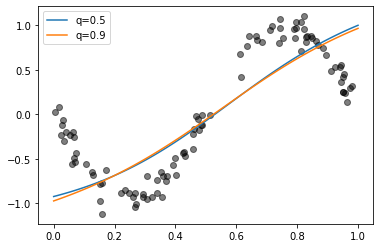

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K  # Add this line to import Keras backend

# Generate some random data
x = np.random.uniform(low=0, high=1, size=100)
y = -np.sin(2 * np.pi * x) - np.random.normal(scale=0.1, size=100)

# Define the quantiles to predict
quantiles = [0.5, 0.95]

# Define the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(len(quantiles), activation='linear'))

# Define the loss function for quantile regression
def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return K.mean(K.maximum(q * e, (q - 1) * e), axis=-1)

# Compile the model
model.compile(loss=lambda y_true, y_pred: quantile_loss(0.5, y_true, y_pred),
              optimizer='adam')

# Train the model
model.fit(x, y, epochs=1000, verbose=0)

# Predict the quantiles for some new input data
new_x = np.linspace(0, 1, 100)
quantile_predictions = model.predict(new_x)

# Plot the results
import matplotlib.pyplot as plt
for i, q in enumerate(quantiles):
    plt.plot(new_x, quantile_predictions[:, i], label='q=%.1f' % q)
plt.scatter(x, y, color='black', alpha=0.5)
plt.legend()
plt.show()


4/4 [==============================] - 0s 6ms/step


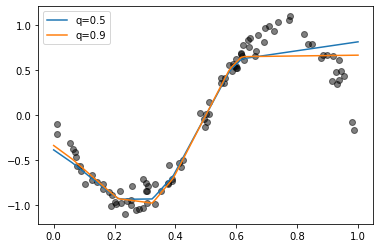

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K  # Add this line to import Keras backend

# Generate some random data
x = np.random.uniform(low=0, high=1, size=100)
y = -np.sin(2 * np.pi * x) - np.random.normal(scale=0.1, size=100)

# Define the quantiles to predict
quantiles = [0.5, 0.95]

# Define the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(quantiles), activation='linear'))

# Define the loss function for quantile regression
def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return K.mean(K.maximum(q * e, (q - 1) * e), axis=-1)

# Compile the model
model.compile(loss=lambda y_true, y_pred: quantile_loss(0.5, y_true, y_pred),
              optimizer='adam')

# Train the model
model.fit(x, y, epochs=1000, verbose=0)

# Predict the quantiles for some new input data
new_x = np.linspace(0, 1, 100)
quantile_predictions = model.predict(new_x)

# Plot the results
import matplotlib.pyplot as plt
for i, q in enumerate(quantiles):
    plt.plot(new_x, quantile_predictions[:, i], label='q=%.1f' % q)
plt.scatter(x, y, color='black', alpha=0.5)
plt.legend()
plt.show()


100 2


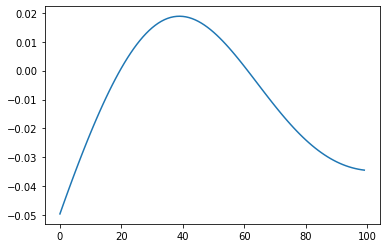

In [5]:
rr,cc = quantile_predictions.shape
print(rr,cc)
Dcovar = quantile_predictions[:,1]-quantile_predictions[:,0]
Dcovar
plt.plot(Dcovar)


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate some random data
n_samples = 1000
X = np.random.randn(n_samples, 3)
y = np.zeros(n_samples)
# Define a threshold for regime switching based on the first input variable
threshold = np.median(X[:, 0])

# Define the neural network architecture
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
# Add a sigmoid activation to the output layer for regime switching
model.add(layers.Dense(1, activation='sigmoid'))

# Define the loss function and optimizer
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 100
history = model.fit(X, y, batch_size=batch_size, epochs=epochs)

# Evaluate the model
preds = model.predict(X)
# Convert the sigmoid output to a regime label based on the threshold
regime_labels = np.zeros(n_samples)
regime_labels[preds[:, 0] >= threshold] = 1
accuracy = np.mean(y == regime_labels)
print(f"Accuracy: {accuracy}")


Epoch 1/100


C:\Users\mcnel\.julia\conda\3\lib\site-packages\keras\backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 0s 786us/step - loss: 0.3450 - accuracy: 1.0000
Epoch 2/100
32/32 [==============================] - 0s 753us/step - loss: 0.0763 - accuracy: 1.0000
Epoch 3/100
32/32 [==============================] - 0s 556us/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 5/100
32/32 [==============================] - 0s 488us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/100
32/32 [==============================] - 0s 370us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/100
32/32 [==============================] - 0s 837us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/100
32/32 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/100
32/32 [==============================] - 0s 770us/step - loss: 8.5743e-04 - accuracy: 1.0000
E

32/32 [==============================] - 0s 951us/step - loss: 7.8866e-06 - accuracy: 1.0000
Epoch 80/100
32/32 [==============================] - 0s 494us/step - loss: 7.6452e-06 - accuracy: 1.0000
Epoch 81/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4038e-06 - accuracy: 1.0000
Epoch 82/100
32/32 [==============================] - 0s 333us/step - loss: 7.1830e-06 - accuracy: 1.0000
Epoch 83/100
32/32 [==============================] - 0s 554us/step - loss: 6.9623e-06 - accuracy: 1.0000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 6.7505e-06 - accuracy: 1.0000
Epoch 85/100
32/32 [==============================] - 0s 459us/step - loss: 6.5520e-06 - accuracy: 1.0000
Epoch 86/100
32/32 [==============================] - 0s 671us/step - loss: 6.3518e-06 - accuracy: 1.0000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1650e-06 - accuracy: 1.0000
Epoch 88/100
32/32 [==============================] - 0s 804us/st